# import libraries

In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder , PowerTransformer
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector


# Load data Updated

In [2]:
df = pd.read_csv('Car Sales Updated.csv')

# Drop col called Unnamed: 0

In [3]:
df.drop('Unnamed: 0' , axis = 1 , inplace= True)

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,launch_Year,launch_Month,launch_Day,seasonality,Headquarters
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2012,2,Thursday,first half,U.S
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2011,6,Friday,first half,U.S
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,2012,1,Wednesday,first half,U.S
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2011,3,Thursday,first half,U.S
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,2011,10,Saturday,second half,Germany


# drop columns I do not need it

In [5]:
df_final = df.drop(['launch_Year' , 'launch_Month' ,'launch_Day' , 'Model'] , axis=1 )

In [6]:
df_final.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,seasonality,Headquarters
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,first half,U.S
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,first half,U.S
2,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN,first half,U.S
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,first half,U.S
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,second half,Germany


# Split data 

In [7]:
# Features , Target
X = df_final.drop('Sales_in_thousands' , axis=1)
y = df['Sales_in_thousands']

In [8]:
X_trian , X_test , y_trian , y_test = train_test_split(X , y , test_size = 0.2 , shuffle = True  )

In [9]:
X_trian.shape , y_trian.shape

((125, 15), (125,))

In [10]:
X_test.shape , y_test.shape

((32, 15), (32,))

In [12]:
X_trian['Vehicle_type'].value_counts()

Passenger    91
Car          34
Name: Vehicle_type, dtype: int64

In [11]:
X_test['Vehicle_type'].value_counts()

Passenger    25
Car           7
Name: Vehicle_type, dtype: int64

# Preprocessing 

# Split columns

In [15]:
col_Of_Nu = X_trian.select_dtypes(include='number').columns.tolist()
Ord_cat = ['Vehicle_type' , 'seasonality']
One_cat = ['Manufacturer' , 'Headquarters']
print(col_Of_Nu)

['__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']


# building Pipeline

In [16]:
Pip_1 = Pipeline(steps=[
        ('selector' , DataFrameSelector(col_Of_Nu)),
        ('Imputer' , SimpleImputer(strategy = 'median')),
        ('box_cox_scaler' , PowerTransformer(method = 'box-cox' , standardize = True))
])

Pip_2 = Pipeline(steps= [
        ('selector' , DataFrameSelector(Ord_cat)),
        ('Imputer' , SimpleImputer(strategy = 'most_frequent')),
        ('encoder' , OrdinalEncoder())
])

Pip_3 = Pipeline(steps=[
        ('selector' , DataFrameSelector(One_cat)),
        ('Imputer' , SimpleImputer(strategy = 'most_frequent')),
        ('encoder' , OneHotEncoder(sparse = False ,  drop = 'first'))
])

Total_Pip = FeatureUnion(transformer_list=[
        ('Pip_1' , Pip_1),
        ('Pip_2' , Pip_2 ),
        ('Pip_3' , Pip_3)
])

In [17]:
X_trian_final = Total_Pip.fit_transform(X= X_trian)


In [18]:
X_test_final = Total_Pip.transform(X_test)

______________________________________________________________

# Ensure effectiveness

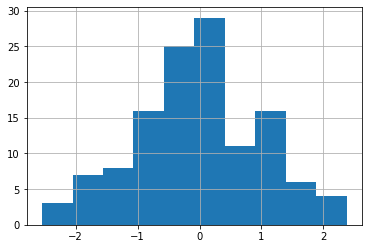

In [19]:
pd.DataFrame(X_trian_final).iloc[: , 1].hist()

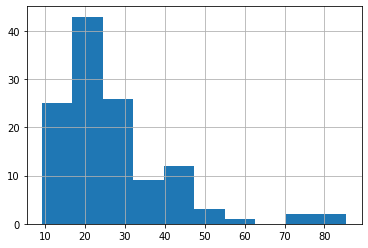

In [20]:
X_trian['Price_in_thousands'].hist()

In [23]:
pd.DataFrame(X_trian_final).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int64